## Projeto Analysis of Diabetes Risk Factor

### Modelagem de Dados.

#### Importando as bibliotecas necessárias.

In [36]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chisquare

### Carregando todos os dados brutos.

#### Criando uma estrutura de Dataframe vazia.

In [38]:
df_diabetes_indcators = pd.DataFrame(data=None)

#### Carregando dados locais para o Dataframe.

In [39]:
# for sheet in glob.glob("../datalake/landing/working-hours/*.xlsx"):
#     df_ = pd.read_excel(sheet)
#     df_sistema_ponto = pd.concat([df_sistema_ponto,df_])

# Windows
for sheet in glob.glob("..\\datalake\\landing\\*.csv"):
    df_temporary = pd.read_csv(sheet)
    df_diabetes_indcators = pd.concat([df_diabetes_indcators,df_temporary])

In [40]:
df_diabetes_indcators.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,NaN
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,NaN
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,NaN
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,NaN
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,NaN


### Pré-processamento e limpeza

#### Organizando coluna alvo.
Dentre os arquivos que foram carregados para o dataset, em alguns a coluna alvo é **Diabetes_012**, que possui os valores:
- 0 = sem diabetes 
- 1 = pré-diabetes 
- 2 = diabetes

Já em outros arquivos, a coluna alvo é **Diabetes_binary**, que possui os valores:
- 0 = sem diabetes 
- 1 = pré-diabetes ou diabetes

Por questões de definição do problema, vamos considerar a opção binária. Logo, a coluna **Diabetes_012** será removida e terá seus valores mapeados para **Diabetes_binary**, sendo:
- 0 = 0
- 1 ou 2 = 1

In [41]:
def map_target_column(Diabetes_012, Diabetes_binary):
    if Diabetes_012 >= 0:
        if Diabetes_012 == 0:
            return 0
        elif Diabetes_012 in [1, 2]:
            return 1
    return Diabetes_binary

In [42]:
df_diabetes_indcators['Diabetes_binary'] = df_diabetes_indcators\
    .apply(lambda x: map_target_column(x['Diabetes_012'], x['Diabetes_binary']), axis=1)

In [43]:
df_diabetes_indcators.drop('Diabetes_012', axis=1, inplace=True)

#### Renomeando atributos

In [44]:
df_diabetes_indcators = df_diabetes_indcators.rename(
    columns={'Diabetes_binary': 'diabetes', 
             'HighBP': 'high_blood_preassure',
             'HighChol': 'high_cholesterol',
             'CholCheck': 'cholesterol_check',
             'BMI': 'body_mass_index',
             'Smoker': 'smoker',
             'Stroke' : 'avc',
             'HeartDiseaseorAttack': 'heart_diseaseor_attack',
             'PhysActivity': 'physical_activity_in_past_30_days',
             'Fruits': 'at_least_one_fruit_a_day',
             'Veggies': 'at_least_one_veggies_a_day',
             'HvyAlcoholConsump': 'high_consumption_of_alcohol',
             'AnyHealthcare': 'any_healthcare', 
             'NoDocbcCost': 'no_doctor_because_cost', 
             'GenHlth': 'general_health_scale', 
             'MentHlth': 'days_of_poor_mental_health', 
             'PhysHlth': 'physical_illness_injury_days', 
             'DiffWalk': 'serious_difficulty_walking',
             'Sex': 'sex', 
             'Age': 'age', 
             'Education': 'education', 
             'Income': 'income'
            }
)

#### Organizando o dataset.

In [45]:
df_diabetes_indcators = df_diabetes_indcators[
    ['high_blood_preassure', 'high_cholesterol', 'cholesterol_check', 'body_mass_index', 'avc', 'heart_diseaseor_attack',
     'smoker', 'physical_activity_in_past_30_days', 'at_least_one_fruit_a_day', 'at_least_one_veggies_a_day',
     'high_consumption_of_alcohol', 'any_healthcare', 'no_doctor_because_cost', 'general_health_scale', 
     'days_of_poor_mental_health', 'physical_illness_injury_days', 'serious_difficulty_walking',
     'sex', 'age', 'education', 'income', 'diabetes']
]

In [46]:
df_diabetes_indcators.head()

,high_blood_preassure,high_cholesterol,cholesterol_check,body_mass_index,avc,heart_diseaseor_attack,smoker,physical_activity_in_past_30_days,at_least_one_fruit_a_day,at_least_one_veggies_a_day,...,no_doctor_because_cost,general_health_scale,days_of_poor_mental_health,physical_illness_injury_days,serious_difficulty_walking,sex,age,education,income,diabetes
0,1.0,1.0,1.0,40.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,0.0
1,0.0,0.0,0.0,25.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,0.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,0.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,0.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,0.0


#### Verificando os registros missing.

In [47]:
df_diabetes_indcators.isnull().sum()

high_blood_preassure                 0
high_cholesterol                     0
cholesterol_check                    0
body_mass_index                      0
avc                                  0
heart_diseaseor_attack               0
smoker                               0
physical_activity_in_past_30_days    0
at_least_one_fruit_a_day             0
at_least_one_veggies_a_day           0
high_consumption_of_alcohol          0
any_healthcare                       0
no_doctor_because_cost               0
general_health_scale                 0
days_of_poor_mental_health           0
physical_illness_injury_days         0
serious_difficulty_walking           0
sex                                  0
age                                  0
education                            0
income                               0
diabetes                             0
dtype: int64

#### Alterando os tipos de dados.

In [48]:
df_diabetes_indcators.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578052 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   high_blood_preassure               578052 non-null  float64
 1   high_cholesterol                   578052 non-null  float64
 2   cholesterol_check                  578052 non-null  float64
 3   body_mass_index                    578052 non-null  float64
 4   avc                                578052 non-null  float64
 5   heart_diseaseor_attack             578052 non-null  float64
 6   smoker                             578052 non-null  float64
 7   physical_activity_in_past_30_days  578052 non-null  float64
 8   at_least_one_fruit_a_day           578052 non-null  float64
 9   at_least_one_veggies_a_day         578052 non-null  float64
 10  high_consumption_of_alcohol        578052 non-null  float64
 11  any_healthcare                     5780

In [49]:
columns = list(df_diabetes_indcators.columns)
columns.remove('body_mass_index')

In [50]:
for column in columns:
    df_diabetes_indcators[column] = df_diabetes_indcators[column].astype(int)

In [51]:
df_diabetes_indcators.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578052 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   high_blood_preassure               578052 non-null  int32  
 1   high_cholesterol                   578052 non-null  int32  
 2   cholesterol_check                  578052 non-null  int32  
 3   body_mass_index                    578052 non-null  float64
 4   avc                                578052 non-null  int32  
 5   heart_diseaseor_attack             578052 non-null  int32  
 6   smoker                             578052 non-null  int32  
 7   physical_activity_in_past_30_days  578052 non-null  int32  
 8   at_least_one_fruit_a_day           578052 non-null  int32  
 9   at_least_one_veggies_a_day         578052 non-null  int32  
 10  high_consumption_of_alcohol        578052 non-null  int32  
 11  any_healthcare                     5780

#### Removendo dados duplicados (valores iguais em todas as colunas).

In [81]:
df_diabetes_indcators.drop_duplicates(subset=None, keep='first', inplace=True)

### Análise Exploratória de Dados.

In [82]:
df_diabetes_indcators.shape

(234034, 22)

#### Calculando a taxa de diabetes

In [83]:
diabetes_rate = df_diabetes_indcators. diabetes.value_counts() / len(df_diabetes_indcators)
diabetes_rate

0    0.83055
1    0.16945
Name: diabetes, dtype: float64

#### Overview statistico dos dados.

In [84]:
df_diabetes_indcators[['general_health_scale', 'days_of_poor_mental_health', 'physical_illness_injury_days', 
                       'body_mass_index', 'age', 'education', 'income']].describe()

,general_health_scale,days_of_poor_mental_health,physical_illness_injury_days,body_mass_index,age,education,income
count,234034.000000,234034.000000,234034.000000,234034.000000,234034.000000,234034.000000,234034.000000
mean,2.609275,3.531115,4.715473,28.727869,8.104199,4.975692,5.877582
std,1.065605,7.744930,9.081022,6.799401,3.089272,0.995056,2.096647
min,1.000000,0.000000,0.000000,12.000000,1.000000,1.000000,1.000000
25%,2.000000,0.000000,0.000000,24.000000,6.000000,4.000000,4.000000
50%,3.000000,0.000000,0.000000,27.000000,8.000000,5.000000,6.000000
75%,3.000000,2.000000,4.000000,32.000000,10.000000,6.000000,8.000000
max,5.000000,30.000000,30.000000,98.000000,13.000000,6.000000,8.000000


#### Overview estatistico por diabete.

In [85]:
df_diabetes_indcators[['general_health_scale', 'days_of_poor_mental_health', 'physical_illness_injury_days', 
                       'body_mass_index', 'age', 'education', 'income', 'diabetes']].groupby('diabetes').mean()

,general_health_scale,days_of_poor_mental_health,physical_illness_injury_days,body_mass_index,age,education,income
diabetes,,,,,,,
0,2.476497,3.332277,4.080442,28.095855,7.851984,5.023069,6.013705
1,3.260080,4.505711,7.828051,31.825655,9.340419,4.743475,5.210379


### Definição das escalas das variáveis.

#### Idade segundo a seguinte escala
https://www.icpsr.umich.edu/web/NAHDAP/studies/34085/datasets/0001/variables/AGEG5YR?archive=NAHDAP

#### Educação segundo a seguinte escala:
- 1 = Não frequentou a escola ou apenas jardim de infância.
- 2 = Fundamental completo ou não.
- 3 = Ensino médio incompleto.
- 4 = Ensino médio completo.
- 5 = Superior incompleto.
- 6 = Superior completo.

#### Renda segundo a seguinte escala (Dólares):
- 1 = Menos do que 10000.
- 5 = Menos do que 35000.
- 8 = 75000 ou mais.

#### Escala de saúde geral:

- 1 = Excelente
- 2 = Muito bom 
- 3 = Bom 
- 4 = Razoável 
- 5 = Ruim

#### Saúde mental:
Quantos dos últimos 30 dias representam dias com estresse, depressão e outros problemas emocionais.

#### Saúde física:
Quantos dos últimos 30 dias representam dias com doenças físicas e lesões e outros problemas físicos.

### Considerações estatísticas

- A base está bem desbalanceada, com apenas 17% de casos de diabetes ou pré-diabetes.
- Há forte tendência de que pessoas com maior frequência de problemas físicos e emocionais desenvolvam diabetes.
- Também há maior tendência da doença em pessoas mais velhas e com IMC acima de 30.
- Inicialmente, há leve relação do nível de escolaridade e renda com a doença.
- A maioria das pessoas possui pouquíssimos dias com ocorrência de problemas físicos e emocionais.

### Possíveis fatores.

De acordo com estudos:
- https://www.saude.pr.gov.br/Pagina/Diabetes-diabetes-mellitus
- https://linhasdecuidado.saude.gov.br/portal/diabetes-mellitus-tipo-2-(DM2)-no-adulto/unidade-de-atencao-primaria/dm2-cronica/questionario-finnish-diabetes-risk-score

Variáveis de interesse podem ser: 
- Hábitos aliementares.
- Hábito de fumar.
- Pressão e colesterol altos.
- Prática de atividades físicas.
- IMC alto.
- Problemas físicos e emocionais.
- Idade.


#### Calculando a matriz de correlação de variáveis numéricas.

,general_health_scale,days_of_poor_mental_health,physical_illness_injury_days,body_mass_index,age,education,income,diabetes
general_health_scale,1.000000,0.285580,0.516984,0.208734,0.143874,-0.245710,-0.332710,0.275863
days_of_poor_mental_health,0.285580,1.000000,0.342003,0.069453,-0.104104,-0.077033,-0.187247,0.056839
physical_illness_injury_days,0.516984,0.342003,1.000000,0.103045,0.093762,-0.128359,-0.241869,0.154819
body_mass_index,0.208734,0.069453,0.103045,1.000000,-0.050177,-0.075005,-0.069573,0.205788
age,0.143874,-0.104104,0.093762,-0.050177,1.000000,-0.092040,-0.116043,0.180750
education,-0.245710,-0.077033,-0.128359,-0.075005,-0.092040,1.000000,0.420018,-0.105410
income,-0.332710,-0.187247,-0.241869,-0.069573,-0.116043,0.420018,1.000000,-0.143738
diabetes,0.275863,0.056839,0.154819,0.205788,0.180750,-0.105410,-0.143738,1.000000


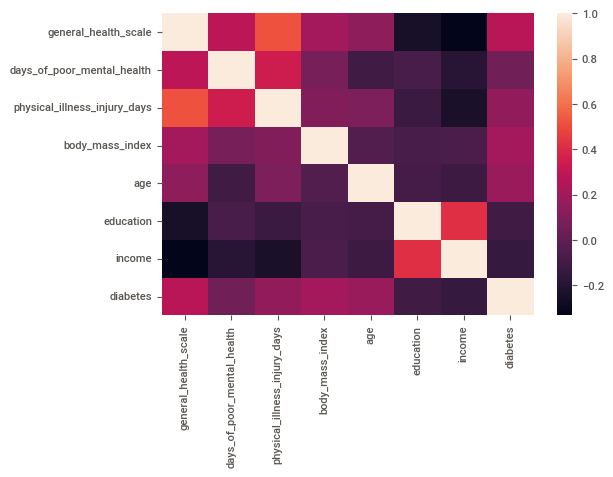

In [86]:
corr = (df_diabetes_indcators[['general_health_scale', 'days_of_poor_mental_health', 'physical_illness_injury_days', 
                               'body_mass_index', 'age', 'education', 'income', 'diabetes']].corr())
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

###  Correlation Matrix & Heatmap

**Questões:**
- Quais atributos afetam nossa variável alvo (diabetes)?
- Existem atributos com alta correlação entre eles?
- Como podemos aprofundar para entender as correlações?

**Resumo:**

**correlação positiva*

Existe uma correlação consideravelmente forte do atributo de escala geral de saúde com os atributos referentes aos dias com mal estar físico e emocional.

Faz sentido que pessoas que se consideram com melhor saúde, de forma geral, se sintam bem na maioria dos dias e vice-versa.
Então podemos descartar algum deles, a fim de reduzir a dimensionalidade.

Também há uma correlação moderada entre os atributos de saúde física e emocional, o que pode ser explicado pelo fato de a diabete causar impacto em ambos, além de que alguém com fortes incômodos físicos pode se sentir emocionalmente abalado. 

Educação e renda estão fortemente relacionado, o que pode ser explicado por, normalmente, pessoas com maior graduação terem melhores empregos. Então, talvez possamos considerar apenas um deles.

**correlação negativa**

Há uma correlação moderada entre a renda/educação e qualidade de saúde, em geral. Isso é plausível, já que pessoas mais ricas e estudas tendem a poder cuidar melhor da saúde, bem como ter mais atenção com a mesma.

**diabetes**

Considerável correlação positiva com a qualidade de saúde. Faz sentido que quem se sente mais saudável e possui menor frequência de síntomas físicos e emocionais, tenha menor chance de possuir a doença.

Também há correlação positiva com idade e IMC, o que é reforçado por estudos que mostram que pessoas mais velhas e acima do peso, tenham chances maiores de desenvolver a doença.

Há razoável correlação negativa com renda e educação, o que pode ser devido ao fato de que pessoas mais ricas e estudadas possam cuidar melhor da saúde.

#### Calculando distribuições dos atributos.

C:\Users\Joaquim Aniceto\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


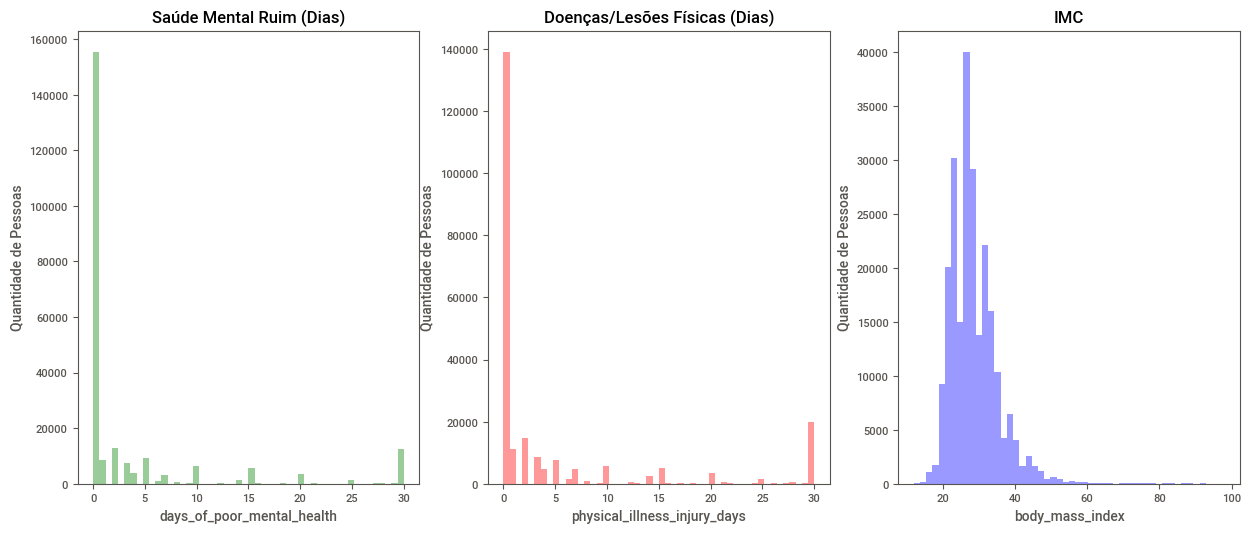

In [87]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 6))

sns.distplot(df_diabetes_indcators['days_of_poor_mental_health'], kde=False, color="g", 
             ax=axes[0]).set_title('Saúde Mental Ruim (Dias)')
axes[0].set_ylabel('Quantidade de Pessoas')

sns.distplot(df_diabetes_indcators['physical_illness_injury_days'], kde=False, color="r", 
             ax=axes[1]).set_title('Doenças/Lesões Físicas (Dias)')
axes[1].set_ylabel('Quantidade de Pessoas')

sns.distplot(df_diabetes_indcators['body_mass_index'], kde=False, color="b",
             ax=axes[2]).set_title('IMC')
axes[2].set_ylabel('Quantidade de Pessoas')

plt.show()

### Distribuiçöes (Saúde Mental - Saúde Física - IMC)
***
**Resuomo:** Examinando a distribuição de alguns atributos do conjunto de dados:
 - **Saúde Mental** - A grande maioria das pessoas tem menos de 5 dias de mal estar, mas há um pico de extremos.
 - **Saúde Física** - Distribuição quase igual a da saúde mental, com ainda mais casos extremos.
 - **IMC** - Maioria das pessoas com IMC em torno da média de 30, tendo poucas obesas.
 
**Pontos:** 
 - Frequência de dias com estado físico e emocional ruim é equivalente.

#### Verificando distribuição de IMC em relação à diabete.

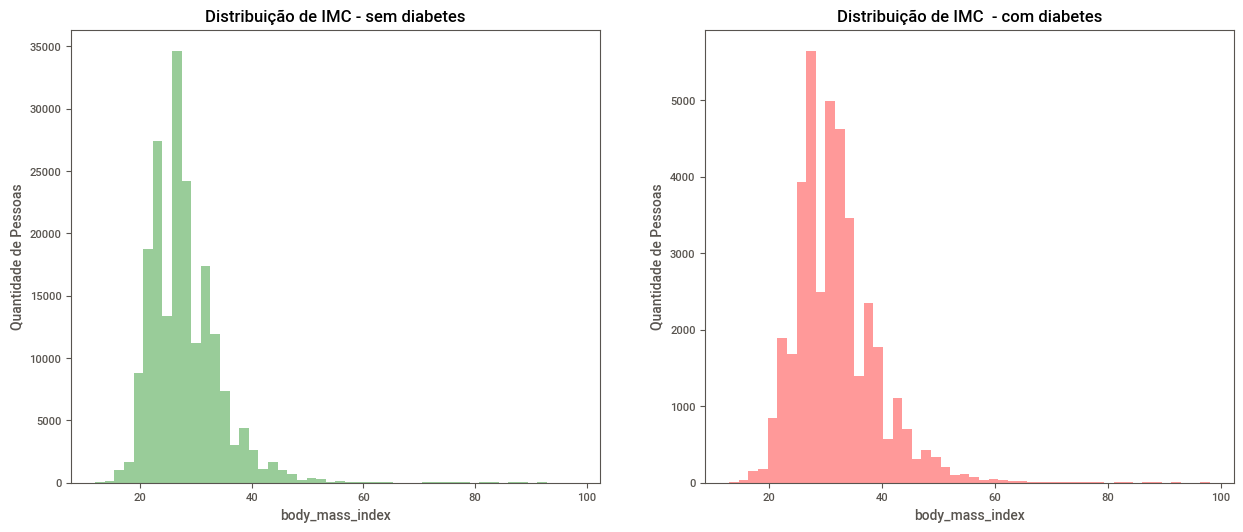

In [88]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))

data_without_diabetes = df_diabetes_indcators[df_diabetes_indcators['diabetes'] == 0]['body_mass_index']
sns.distplot(data_without_diabetes, kde=False, color="g", ax=axes[0]).set_title('Distribuição de IMC - sem diabetes')
axes[0].set_ylabel('Quantidade de Pessoas')

data_with_diabetes = df_diabetes_indcators[df_diabetes_indcators['diabetes'] == 1]['body_mass_index']
sns.distplot(data_with_diabetes, kde=False, color="r", ax=axes[1]).set_title('Distribuição de IMC  - com diabetes')
axes[1].set_ylabel('Quantidade de Pessoas')

plt.show()

##  IMC V.S. Diabetes
***
**Resumo:**
 - A distribuição é bem parecida, porém pessoas com diabetes tendem a maior IMC, e se concentram mais entre 25 e 30.
 - Quantidade razoável de pessoas entre 25 e 30 que não possuem diabetes. Pode confundir o modelo?
 - COnsiderar bins pode ajudar?

#### Verificando distribuição de dias de saúde física ruim em relação à diabete.

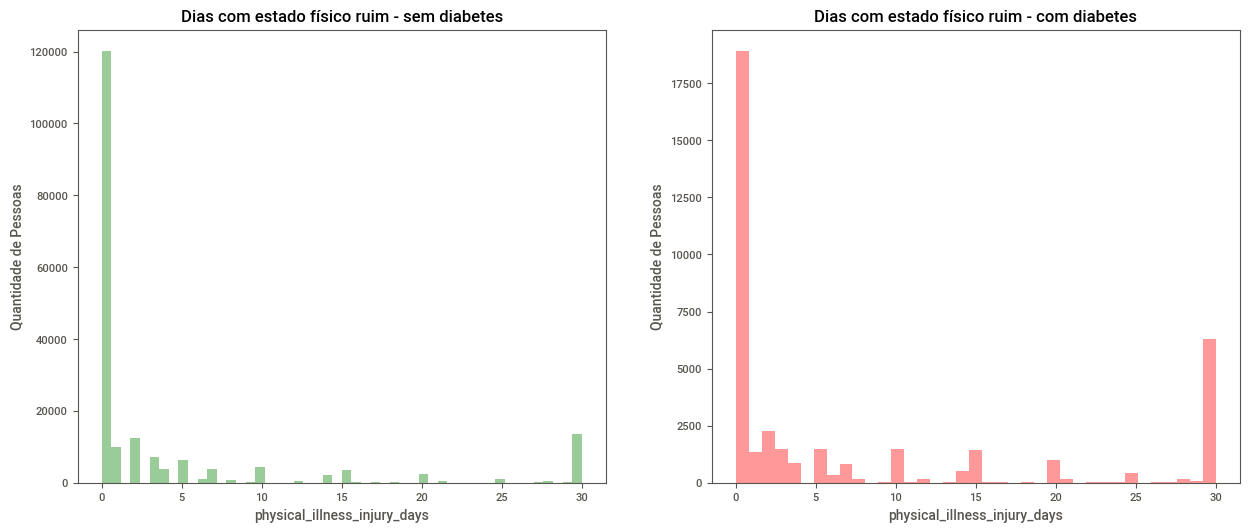

In [89]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))

data_without_diabetes = df_diabetes_indcators[df_diabetes_indcators['diabetes'] == 0]['physical_illness_injury_days']
sns.distplot(data_without_diabetes, kde=False, color="g", ax=axes[0]).set_title('Dias com estado físico ruim - sem diabetes')
axes[0].set_ylabel('Quantidade de Pessoas')

data_with_diabetes = df_diabetes_indcators[df_diabetes_indcators['diabetes'] == 1]['physical_illness_injury_days']
sns.distplot(data_with_diabetes, kde=False, color="r", ax=axes[1]).set_title('Dias com estado físico ruim - com diabetes')
axes[1].set_ylabel('Quantidade de Pessoas')

plt.show()

##  Saúde Física V.S. Diabetes
***
**Resumo:**
 - Pessoas com diabetes formam mais picos de dias ruins do estado físico.
 - Distribuição é quase a mesma para poucos dias ruins, com e sem diabetes.
 
**Questões:**
 - A semelhança na distribuição pode confundir o modelo de classificação?
 - Considerar bins de 10 dias pode ajudar a diferenciar?

#### Verificando a ocorrência de diabete em relação à qualidade da saúde.

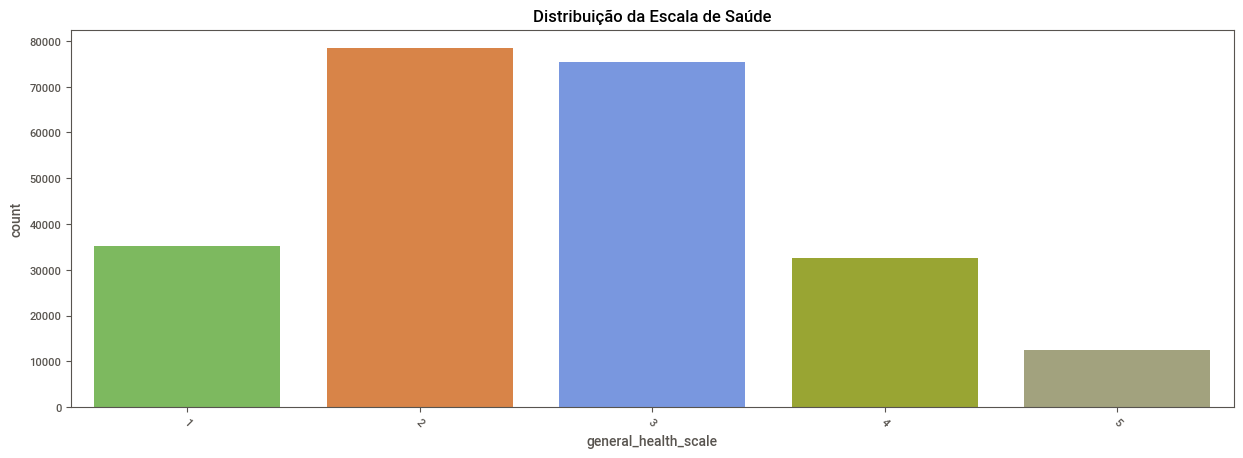

In [90]:
fig, ax = plt.subplots(figsize=(15, 5))
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']
plt.xticks(rotation=-45)

sns.countplot(x='general_health_scale', data=df_diabetes_indcators, 
              palette=color_types).set_title('Distribuição da Escala de Saúde');

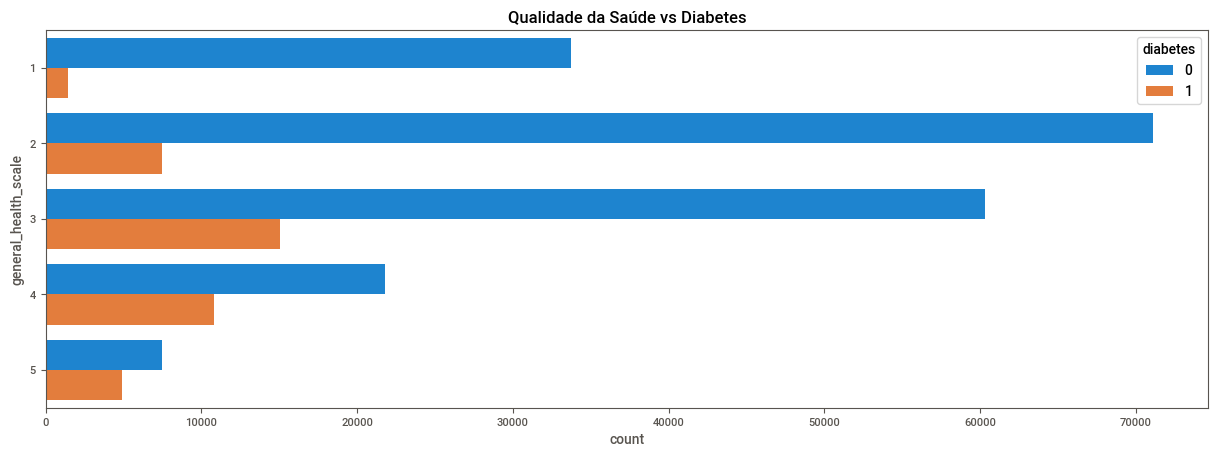

In [91]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="general_health_scale", hue='diabetes', data=df_diabetes_indcators)\
    .set_title('Qualidade da Saúde vs Diabetes');

## Escala de Sáude V.S. Diabetes 
***
**Resumo:**
 - Comoe esperado, pessoas com maior qualidade de saúde possuem baixa ocorrência de diabetes.
 - À medida que a qualidade de saúde reduz, os casos de diabetes aumentam bastante, de modo que pessoas com saúde ruim, possuem alta frequência da doença.

#### Verificando a ocorrência de diabete em relação à idade.

[]

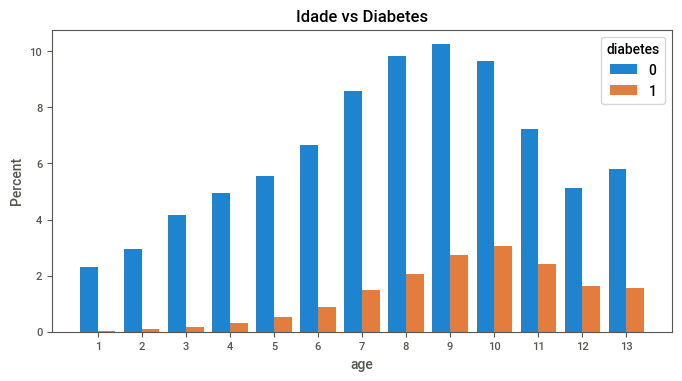

In [92]:
fig = plt.figure(figsize=(8,4),)
ax = sns.barplot(x="age", y="age", hue="diabetes", data=df_diabetes_indcators, 
                 estimator=lambda x: len(x) / len(df_diabetes_indcators) * 100)
ax.set(ylabel="Percent")
plt.title('Idade vs Diabetes')
plt.plot()

## Idade V.S. Diabetes 
***
**Resumo:** Insights interessantes que encontramos aqui:
 - Existe um **tendência considerável de crescimento na taxa de diabates** em relação ao envelhecimento.
 - A imensa maioria das pessoas com diabates está acima dos **45 anos** (6).
 - Maior concentração de pessoas com diabetes entre 60 e 75 anos (9 e 11).

 
**Questões:**
 - Podemos reduzir a escala das idades para melhorar a precisão?

#### Verificando a relação entre idade e IMC.

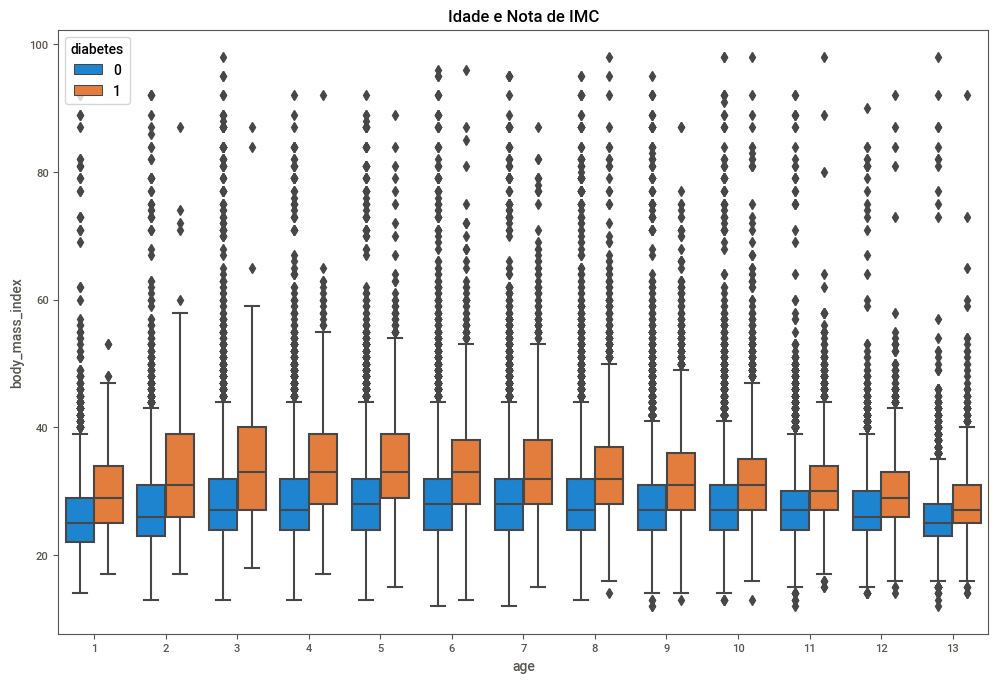

In [93]:
fig = plt.figure(figsize=(12, 8))
sns.boxplot(x="age", y="body_mass_index", hue="diabetes", data=df_diabetes_indcators)
plt.title("Idade e Nota de IMC")
plt.show()

##  Idade VS IMC
***
**Resumo:** 
- Pessoas sem diabetes mantiveramum IMC consistente, normalmente próximo de 25, mesmo entre as mais velhas.
- Para todas as faixas de idade, pessoas com diabetes possuem IMC consideravelmente maior do que as sem diabetes.
- Maior parte das pessoas com diabetes estão com IMC entre 30 e 40, independente da idade.
- Há muitos outliers (IMC extremamente altos), principalmente para maiores faixas de idade.
- Maior parte dos outliers está em pessoas sem diabetes.

**Questões:**
  - Por que há tantas pessoas com IMC tão elevado sem diabetes, mesmo as mais velhas?
  - Necessário tratar outliers para o modelo.

#### Verificando a ocorrência de diabete em relação à educação e renda.

[]

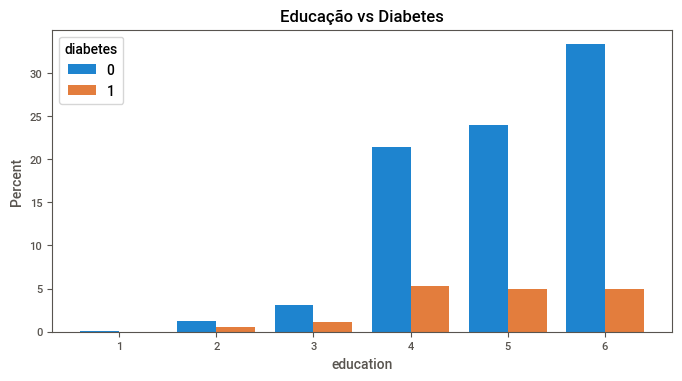

In [94]:
fig = plt.figure(figsize=(8,4),)
ax = sns.barplot(x="education", y="education", hue="diabetes", data=df_diabetes_indcators, 
                 estimator=lambda x: len(x) / len(df_diabetes_indcators) * 100)
ax.set(ylabel="Percent")
plt.title('Educação vs Diabetes')
plt.plot()

[]

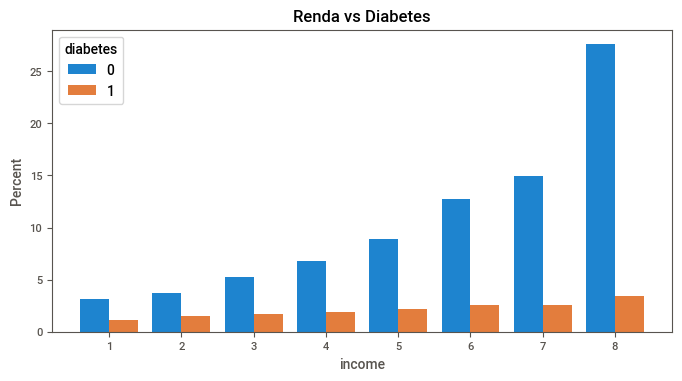

In [95]:
fig = plt.figure(figsize=(8,4),)
ax = sns.barplot(x="income", y="income", hue="diabetes", data=df_diabetes_indcators, 
                 estimator=lambda x: len(x) / len(df_diabetes_indcators) * 100)
ax.set(ylabel="Percent")
plt.title('Renda vs Diabetes')
plt.plot()

##  Renda e Educação VS IMC
***
**Resumo:** 
- O cenário é bem semelhante para as duas variáveis.
- Com aumento da renda e educação, há um aumento considerável de pessoas sem diabetes.
- Quantidade de pessoas com diabete é bem semelhante para todas as faixas de renda e idade.

**Questões:**
  - Usar apenas uma dessas features para o modelo, já que são tão próximas?
  - Apesar de não haver diferenciação para os casos de diabetes, a diferenciação para os casos sem diabetes seria útil para o modelo?

#### Calculando a matriz de correlação de variáveis categóricas.

,high_blood_preassure,high_cholesterol,smoker,physical_activity_in_past_30_days,at_least_one_fruit_a_day,at_least_one_veggies_a_day,diabetes
high_blood_preassure,1.000000,0.283996,0.074076,-0.104363,-0.019744,-0.043555,0.254186
high_cholesterol,0.283996,1.000000,0.075202,-0.063426,-0.026590,-0.028081,0.198763
smoker,0.074076,0.075202,1.000000,-0.066153,-0.062348,-0.013536,0.045288
physical_activity_in_past_30_days,-0.104363,-0.063426,-0.066153,1.000000,0.125191,0.135041,-0.100085
at_least_one_fruit_a_day,-0.019744,-0.026590,-0.062348,0.125191,1.000000,0.243225,-0.024513
at_least_one_veggies_a_day,-0.043555,-0.028081,-0.013536,0.135041,0.243225,1.000000,-0.042293
diabetes,0.254186,0.198763,0.045288,-0.100085,-0.024513,-0.042293,1.000000


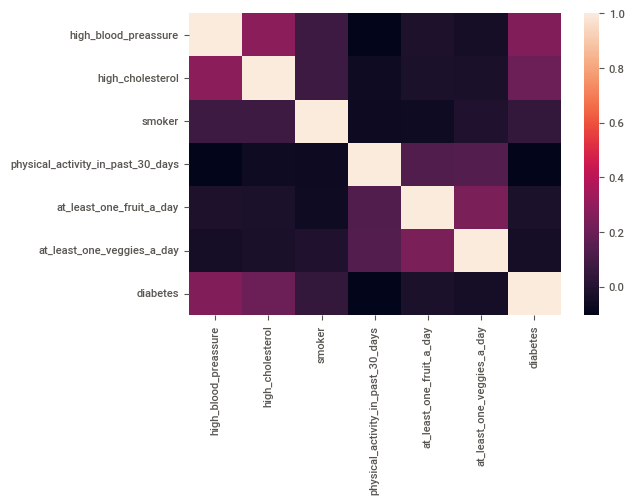

In [96]:
corr = (df_diabetes_indcators[['high_blood_preassure', 'high_cholesterol', 'smoker', 'physical_activity_in_past_30_days',
                               'at_least_one_fruit_a_day', 'at_least_one_veggies_a_day', 'diabetes']].corr())
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

###  Correlation Matrix & Heatmap

**Questões:**
- Quais atributos afetam nossa variável alvo (diabetes)?
- Existem atributos com alta correlação entre eles?
- Como podemos aprofundar para entender as correlações?

**Resumo:**

**correlação positiva*

Existe uma correlação consideravelmente forte entre pressão sanguínea e colesterol.

Faz sentido que pessoas pessoas com alto colesterol, normalmente, possuem maiores problemas de pressão alta. Verificar se podemos considerar só um deles para o modelo ou se será importante usar ambos.


**correlação negativa**

Há uma correlação razoável entre prática de atividade física e pressão sanguínea. Isso é plausível, já que realizar exercícios ajuda consideravelmente na redução da pressão e colesterol.

**diabetes**

Considerável correlação positiva com pressão e colesterol, já que alta pressão e colesterol influenciam no desenvolvimento da doença.

Há razoável correlação negativa com a prática de atividades físicas, o que pode ser devido ao fato de que atividade física moderada diminui o risco de diabetes.

De acordo com estudos, bons hábitos alimentares e não fumar influenciam na redução do risco da doença, porém, a correlação desses com a variável alvo está praticamente irrelevante. Além disso, essa imfluência é em relação à redução do colesterol e peso, que impactam na diabetes. Portanto, podemos desconsiderar atributos referentes à alimentação e fumo.

#### Verificando a influência de pressão e colesterol na diabetes.

[]

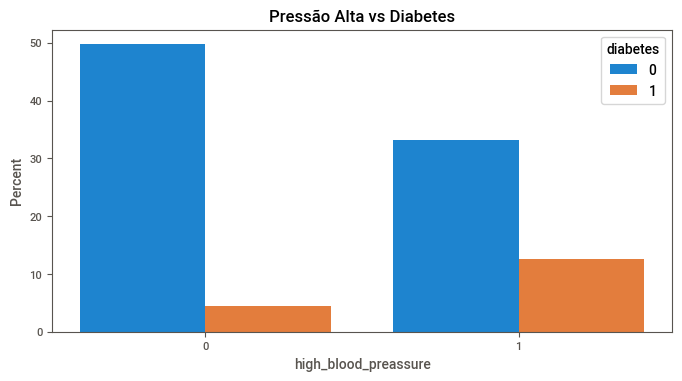

In [97]:
fig = plt.figure(figsize=(8,4),)
ax = sns.barplot(x="high_blood_preassure", y="high_blood_preassure", hue="diabetes", data=df_diabetes_indcators, 
                 estimator=lambda x: len(x) / len(df_diabetes_indcators) * 100)
ax.set(ylabel="Percent")
plt.title('Pressão Alta vs Diabetes')
plt.plot()

[]

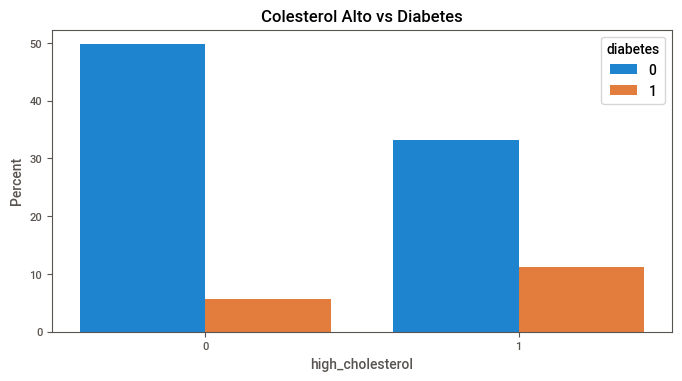

In [98]:
fig = plt.figure(figsize=(8,4),)
ax = sns.barplot(x="high_cholesterol", y="high_cholesterol", hue="diabetes", data=df_diabetes_indcators, 
                 estimator=lambda x: len(x) / len(df_diabetes_indcators) * 100)
ax.set(ylabel="Percent")
plt.title('Colesterol Alto vs Diabetes')
plt.plot()

##  Pressão e Colesterol VS Diabetes
***
**Resumo:** 
- O cenário é praticamente o mesmo para as duas variáveis.
- A grande maioria das pessoas sem pressão e colesterol altos não possui diabetes.
- Pressão e colesterol altos aumentam consideravelmente a ocorrência de diabetes.

**Questões:**
  - Usar apenas uma dessas features para o modelo, já que são tão próximas?

#### Verificando a influência de atividades físicas na diabetes.

[]

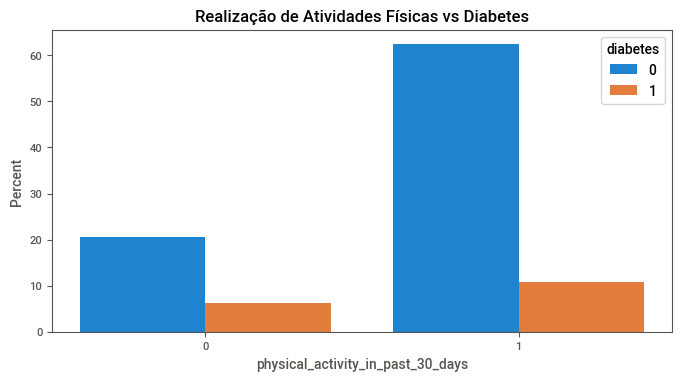

In [99]:
fig = plt.figure(figsize=(8,4),)
ax = sns.barplot(x="physical_activity_in_past_30_days", y="physical_activity_in_past_30_days", hue="diabetes", 
                 data=df_diabetes_indcators, 
                 estimator=lambda x: len(x) / len(df_diabetes_indcators) * 100)
ax.set(ylabel="Percent")
plt.title('Realização de Atividades Físicas vs Diabetes')
plt.plot()

##  Realização de Atividades Físicas VS Diabetes
***
**Resumo:** 
- A grande maioria das pessoas que realizam atividades físicas não possui diabetes.

# Sweetviz

In [ ]:
pip install sweetviz

In [100]:
import sweetviz as sv

my_report = sv.analyze(df_diabetes_indcators,"diabetes")
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
